# データの読み込み

In [1]:
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skorch
import pandas as pd
import sklearn
import csv
import os

In [2]:
DATA_FOLDER = '/home/tamaru/scene_categorize/main/data'
csv_path = os.path.join(DATA_FOLDER, 'stairs_frames_data.csv')
datalist = pd.read_csv(csv_path, names=["img_path", "l_class", 's_class','timestamp'])
datalist.head()

img_path l_class  \
0  /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
1  /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
2  /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
3  /home/tamaru/scene_categorize/main/data/stairs...  8gokan   
4  /home/tamaru/scene_categorize/main/data/stairs...  8gokan   

              s_class            timestamp  
0  8gokan_stairs_east  2019/12/16 15:15:48  
1  8gokan_stairs_east  2019/12/16 15:15:48  
2  8gokan_stairs_east  2019/12/16 15:15:48  
3  8gokan_stairs_east  2019/12/16 15:15:48  
4  8gokan_stairs_east  2019/12/16 15:15:48

#insta_frames->insta_cubemap datalist
c_np = np.array(datalist)
col_name = datalist.columns.values
for row in c_np:
    row[0] = row[0].replace('insta_frames','insta_cubemap')
c_df = pd.DataFrame(c_np, columns=col_name)
c_df.to_csv('../data/cubemap_data.csv', index=False)

In [3]:
dfs = datalist.drop(['l_class', 'timestamp'], axis=1)
dfs.groupby('s_class').count()

img_path
s_class                      
4gokan_stairs             750
5gokan_stairs_east        761
5gokan_stairs_west        866
8gokan_stairs_cnt         839
8gokan_stairs_east        775
denkisogokan_stairs      1098

In [4]:
dfs.img_path.count()

5089

In [5]:
s_class = dfs.s_class.unique()
num_s_class = len(s_class)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder() 
le.fit(dfs.s_class) 
dfs["labels"] = le.transform(dfs.s_class) 
dfs.groupby('labels')

In [9]:
cor_table = dfs.groupby('labels').s_class.unique() 
cor_table = pd.DataFrame(cor_table) 
cor_table

s_class
labels                       
0             [4gokan_stairs]
1        [5gokan_stairs_east]
2        [5gokan_stairs_west]
3         [8gokan_stairs_cnt]
4        [8gokan_stairs_east]
5       [denkisogokan_stairs]

In [10]:
dfs = dfs.drop(['s_class'], axis=1)
dfs

img_path  labels
0     /home/tamaru/scene_categorize/main/data/stairs...       4
1     /home/tamaru/scene_categorize/main/data/stairs...       4
2     /home/tamaru/scene_categorize/main/data/stairs...       4
3     /home/tamaru/scene_categorize/main/data/stairs...       4
4     /home/tamaru/scene_categorize/main/data/stairs...       4
5     /home/tamaru/scene_categorize/main/data/stairs...       4
6     /home/tamaru/scene_categorize/main/data/stairs...       4
7     /home/tamaru/scene_categorize/main/data/stairs...       4
8     /home/tamaru/scene_categorize/main/data/stairs...       4
9     /home/tamaru/scene_categorize/main/data/stairs...       4
10    /home/tamaru/scene_categorize/main/data/stairs...       4
11    /home/tamaru/scene_categorize/main/data/stairs...       4
12    /home/tamaru/scene_categorize/main/data/stairs...       4
13    /home/tamaru/scene_categorize/main/data/stairs...       4
14    /home/tamaru/scene_categorize/main/data/stairs...       4
15    /home/tamaru/scene_categorize/main/data/stairs...       4
16    /home/tamaru/scene_categorize/main/data/stairs...       4
17    /home/tamaru/scene_categorize/main/data/stairs...       4
18    /home/tamaru/scene_categorize/main/data/stairs...       4
19    /home/tamaru/scene_categorize/main/data/stairs...       4
20    /home/tamaru/scene_categorize/main/data/stairs...       4
21    /home/tamaru/scene_categorize/main/data/stairs...       4
22    /home/tamaru/scene_categorize/main/data/stairs...       4
23    /home/tamaru/scene_categorize/main/data/stairs...       4
24    /home/tamaru/scene_categorize/main/data/stairs...       4
25    /home/tamaru/scene_categorize/main/data/stairs...       4
26    /home/tamaru/scene_categorize/main/data/stairs...       4
27    /home/tamaru/scene_categorize/main/data/stairs...       4
28    /home/tamaru/scene_categorize/main/data/stairs...       4
29    /home/tamaru/scene_categorize/main/data/stairs...       4
...                                                 ...     ...
5059  /home/tamaru/scene_categorize/main/data/stairs...       1
5060  /home/tamaru/scene_categorize/main/data/stairs...       1
5061  /home/tamaru/scene_categorize/main/data/stairs...       1
5062  /home/tamaru/scene_categorize/main/data/stairs...       1
5063  /home/tamaru/scene_categorize/main/data/stairs...       1
5064  /home/tamaru/scene_categorize/main/data/stairs...       1
5065  /home/tamaru/scene_categorize/main/data/stairs...       1
5066  /home/tamaru/scene_categorize/main/data/stairs...       1
5067  /home/tamaru/scene_categorize/main/data/stairs...       1
5068  /home/tamaru/scene_categorize/main/data/stairs...       1
5069  /home/tamaru/scene_categorize/main/data/stairs...       1
5070  /home/tamaru/scene_categorize/main/data/stairs...       1
5071  /home/tamaru/scene_categorize/main/data/stairs...       1
5072  /home/tamaru/scene_categorize/main/data/stairs...       1
5073  /home/tamaru/scene_categorize/main/data/stairs...       1
5074  /home/tamaru/scene_categorize/main/data/stairs...       1
5075  /home/tamaru/scene_categorize/main/data/stairs...       1
5076  /home/tamaru/scene_categorize/main/data/stairs...       1
5077  /home/tamaru/scene_categorize/main/data/stairs...       1
5078  /home/tamaru/scene_categorize/main/data/stairs...       1
5079  /home/tamaru/scene_categorize/main/data/stairs...       1
5080  /home/tamaru/scene_categorize/main/data/stairs...       1
5081  /home/tamaru/scene_categorize/main/data/stairs...       1
5082  /home/tamaru/scene_categorize/main/data/stairs...       1
5083  /home/tamaru/scene_categorize/main/data/stairs...       1
5084  /home/tamaru/scene_categorize/main/data/stairs...       1
5085  /home/tamaru/scene_categorize/main/data/stairs...       1
5086  /home/tamaru/scene_categorize/main/data/stairs...       1
5087  /home/tamaru/scene_categorize/main/data/stairs...       1
5088  /home/tamaru/scene_categorize/main/data/stairs...       1

[5089 rows x 2 columns]

# trainデータ, testデータの分割

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_data, test_data = train_test_split(dfs, test_size=0.2, random_state=42, stratify=dfs.labels)

In [13]:
#画像の前処理を定義
data_transforms = {
    'data': transforms.Compose([
        transforms.Resize(224),
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ])
}
#正規化をしない処理
to_tensor_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

In [14]:
class CustomDataset(torch.utils.data.Dataset):
        
    def __init__(self, dataframe, root_dir, transform=None):
        #前処理クラスの指定
        self.transform = transform
        #pandasでcsvデータの読み出し
        #画像とラベルの一覧を保持するリスト
        self.images = np.array(dataframe.img_path).tolist()
        self.labels = np.array(dataframe.labels).tolist()
        self.root_dir = root_dir
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        #dataframeから画像へのパスとラベルを読み出す
        label = self.labels[idx]
        img = self.images[idx]
        #画像の読み込み
        with open(img, 'rb') as f:
            image = Image.open(f)
            image = image.convert('RGB')
            image = image.resize((224,224))
        #画像への処理
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [15]:
train_set = CustomDataset(dataframe=train_data, root_dir="../data/insta_frames", transform=data_transforms['data'])
test_set = CustomDataset(dataframe=test_data, root_dir="../data/insta_frames", transform=data_transforms['data'])

In [16]:
# DataLoaderのcollate_fnはバッチ内のtensorのshapeをすべて同じにする必要がある
# 自分で指定してエラーが起きないようにする
def my_collate_fn(batch):
    # datasetの出力が
    # [image, target] = dataset[batch_idx]
    # の場合.
    images = []
    labels = []
    for image, label in batch:
        images.append(image)
        labels.append(label)
    images = torch.stack(images,dim=0)
    return images, labels

In [17]:
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=16, shuffle=True, num_workers=6)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=16, shuffle=False, num_workers=6)

# ネットワークの定義
vgg16 finetuning

In [18]:
import torchvision.models as models
import bagnets.pytorchnet

In [19]:
num_classes = num_s_class
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = bagnets.pytorchnet.bagnet33(pretrained=True)

In [20]:
#パラメータ凍結と採取層クラス数変更
for param in net.parameters():
    param.requires_grad = False
#最終層をnum_s_classクラス用に変更
num_ftrs = net.fc.in_features
net.fc = nn.Linear(in_features=num_ftrs, out_features=num_classes).to(device)
#最適化関数
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.fc.parameters())
net = net.to(device)
net

BagNet(
  (conv1): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(256,

#学習率の変更
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=)

# 学習の実行

In [21]:
#Cross Validationを行いたい...
#Early Stopping を行いたい

num_epochs = 10
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

for epoch in range(num_epochs):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0
    
    #train
    net.train()
    for i, (images, labels) in enumerate(train_loader):
        #view()での変換をしない
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        train_acc += (outputs.max(1)[1]==labels).sum().item()
        loss.backward()
        optimizer.step()
        
    avg_train_loss = train_loss/len(train_loader.dataset)
    avg_train_acc = train_acc/len(train_loader.dataset)
    
    #val
    net.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            #view()での変換をしない
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1]==labels).sum().item()
   
    avg_val_loss = val_loss/len(test_loader.dataset)
    avg_val_acc = val_acc/len(test_loader.dataset)
    
    print('Epoch [{}/{}], Loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}'.format(epoch+1, num_epochs, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

Epoch [1/10], Loss: 0.0572, val_loss: 0.1072, val_acc: 0.3202
Epoch [2/10], Loss: 0.0224, val_loss: 0.0767, val_acc: 0.4322
Epoch [3/10], Loss: 0.0126, val_loss: 0.0523, val_acc: 0.6542
Epoch [4/10], Loss: 0.0094, val_loss: 0.0320, val_acc: 0.8143
Epoch [5/10], Loss: 0.0073, val_loss: 0.0259, val_acc: 0.8527
Epoch [6/10], Loss: 0.0052, val_loss: 0.0215, val_acc: 0.8851
Epoch [7/10], Loss: 0.0046, val_loss: 0.0112, val_acc: 0.9715
Epoch [8/10], Loss: 0.0039, val_loss: 0.0098, val_acc: 0.9686
Epoch [9/10], Loss: 0.0033, val_loss: 0.0076, val_acc: 0.9833
Epoch [10/10], Loss: 0.0027, val_loss: 0.0034, val_acc: 0.9951


# train, validationのloss acc のグラフを作成

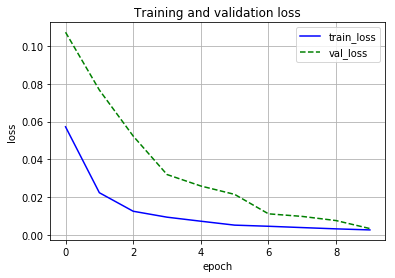

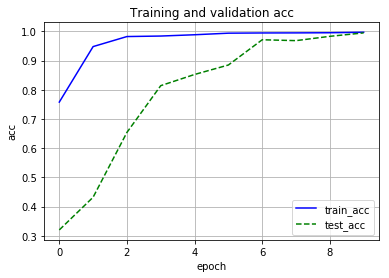

In [22]:
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()

plt.figure()
plt.plot(range(num_epochs), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epochs), val_acc_list, color='green', linestyle='--', label='test_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation acc')
plt.grid()

# Heatmap

In [23]:
from bagnets.utils import plot_heatmap, generate_heatmap_pytorch

In [24]:
net.eval()

BagNet(
  (conv1): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.001, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(2, 2), bias=False)
        (1): BatchNorm2d(256,

In [25]:
def show_heatmap(net, heatmap_dataframe):
    nps = np.array(heatmap_dataframe)
    for row in nps:
        with open(row[0], 'rb') as f:
            image = Image.open(f)
            image = image.convert('RGB')
            image = image.resize((224,224))
            image = transforms.Compose([
                transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])(image)
            image = torch.unsqueeze(image,0)
            original, label = image, [row[1]]
            # torch.Tensor->np.arrayに変換
            # generate_heatmap_pytorchにはnp.arrayの入力が必要
            original = original.numpy()

        heatmap = generate_heatmap_pytorch(net, original, label, 33)

        fig = plt.figure(figsize=(8,4))
        original_image = original[0].transpose([1,2,0])
        ax = plt.subplot(121)
        ax.set_title('original')
        plt.imshow(original_image)
        plt.axis('off')

        ax = plt.subplot(122)
        ax.set_title('heatmap')
        plot_heatmap(heatmap, original_image, ax, dilation=0.5, percentile=99, alpha=.25)
        plt.axis('off')
        plt.show()

In [27]:
sample = dfs.sample(n=8, random_state=42)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


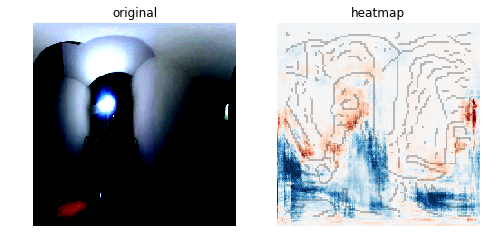

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


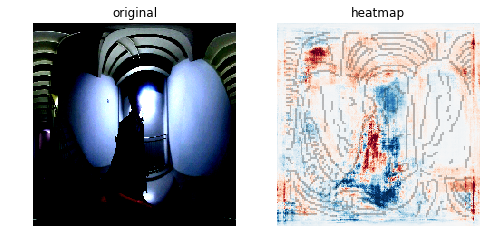

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


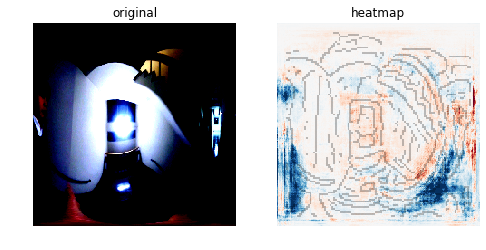

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


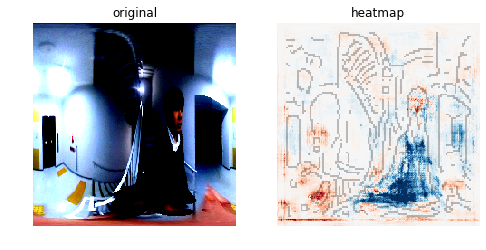

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


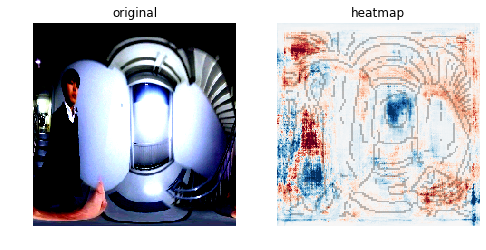

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


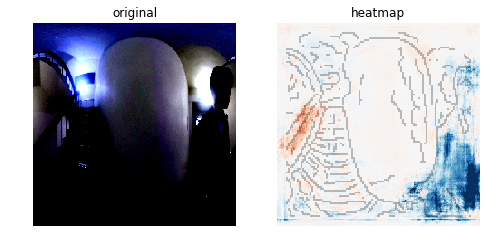

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


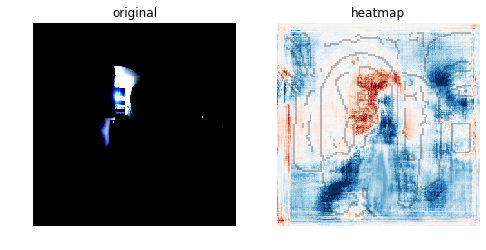

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


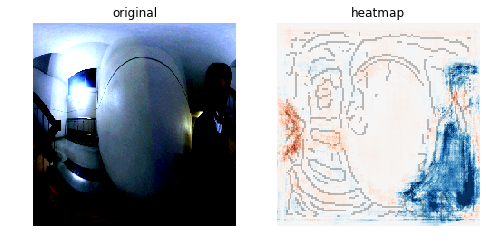

In [28]:
show_heatmap(net, sample)